In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression 
%matplotlib inline
%config InlineBakend.figure_format = 'svg'
from sklearn.svm import SVC
from sklearn.metrics import r2_score

## Задание №1

In [32]:
boston = load_boston()

In [33]:
data = boston.data

In [34]:
feature_name = boston.feature_names

In [35]:
target = boston.target

In [36]:
X = pd.DataFrame(data, columns=feature_name)
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
y = pd.DataFrame(target, columns=['Price'])

In [38]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state=42)

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))

In [41]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [42]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [43]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [44]:
print('\033[1mДо:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


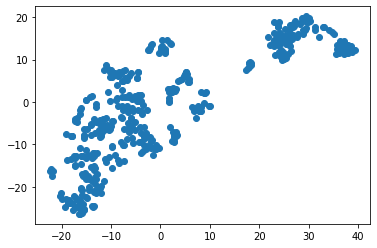

In [45]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

## Задание 2

In [70]:
KM_model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
labels_train = KM_model.fit_predict(X_train_scaled)

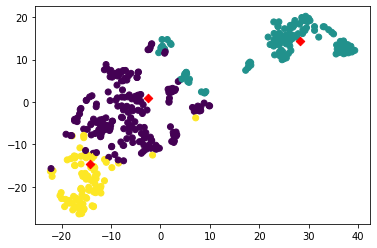

In [71]:
claster_centers = KM_model.fit(X_train_tsne).cluster_centers_
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.scatter(claster_centers[:,0],claster_centers[:,1], marker='D', color='red')
plt.show()

In [72]:
X_train['Clasters'] = labels_train
X_train['Price'] = y_train

<ipython-input-72-ebd81f147f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Clasters'] = labels_train
<ipython-input-72-ebd81f147f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Price'] = y_train


In [73]:
print('{} - средние значение Price'.format(X_train.groupby('Clasters')['Price'].mean()))

Clasters
0    24.958115
1    16.165354
2    27.788372
Name: Price, dtype: float64 - средние значение Price


In [74]:
print('{} - средние значение Crime'.format(X_train.groupby('Clasters')['CRIM'].mean()))

Clasters
0     0.421660
1    10.797028
2     0.073566
Name: CRIM, dtype: float64 - средние значение Crime


### Задание №3

In [75]:
label_test = KM_model.predict(X_test_scaled)

ValueError: Incorrect number of features. Got 13 features, expected 2.

In [59]:
X_test['Claster_pred'] = label_test
X_test['Price'] = y_test

NameError: name 'label_test' is not defined

In [ ]:
sns.boxplot(X_test['Claster_pred'], y_test['Price'], palette='Set1')

In [ ]:
print('{} - средние значение Price'.format(X_test.groupby('Claster_pred')['Price'].mean()))

In [ ]:
print('{} - средние значение Crime'.format(X_test.groupby('Claster_pred')['CRIM'].mean()))

In [57]:
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698
